In [3]:
%pip install ipython
%pip install seaborn
from dateutil.parser import parse
from datetime import datetime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt  
import seaborn as sns

import re


%matplotlib inline

In [5]:
data_ori = pd.read_csv('data/attacks.csv', encoding='latin1')

data = data_ori.copy()

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
data.shape

(25723, 24)

## Luego de utilizar la función de 'data.info', observamos que nuestra data tiene 25.723 filas y 24 columnas, ocupando un total de 22.8 MB de memoria

In [8]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Buscamos si hay filas con valores nulos y procedemos a eliminarlas

In [9]:
filas_nulas = data[data.isnull().all(axis=1)]

In [10]:
filas_nulas

data = data.dropna(how='all')

In [11]:
data.shape

#Ahora nuestra data pasó de 25.723 filas a 8.703

(8703, 24)

In [12]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
'''
Observamos que tenemos una cantidad de filas con valores nulos pero que en la columna 'Case Number'
#poseen '0' o 'xx', por lo que sustituiremos los '0' y 'xx' por nulos y eliminaremos esas filas que no son
relevantes
'''

data['Case Number'] = data['Case Number'].replace('0', np.nan)
data['Case Number'] = data['Case Number'].replace('xx', np.nan)
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.dropna(how='all')

In [15]:
data.shape

(6309, 24)

In [16]:
data.tail(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,...,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN


In [17]:
filas_con_nan = np.where(data['Case Number'].isna() & data['Date'].isna())[0]
filas_con_nan
#data = data.drop(filas_con_nan)

array([6302, 6303, 6304, 6305, 6306, 6307, 6308])

In [18]:
data = data.drop(filas_con_nan)

In [19]:
data.shape

#Hemos eliminado filas con valores nulos, pasando a tener ahora 6.302 filas

(6302, 24)

## Ahora observamos la cantidad de nulos que hay en nuestras columnas para luego analizar los valores que podamos sustituir

In [20]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

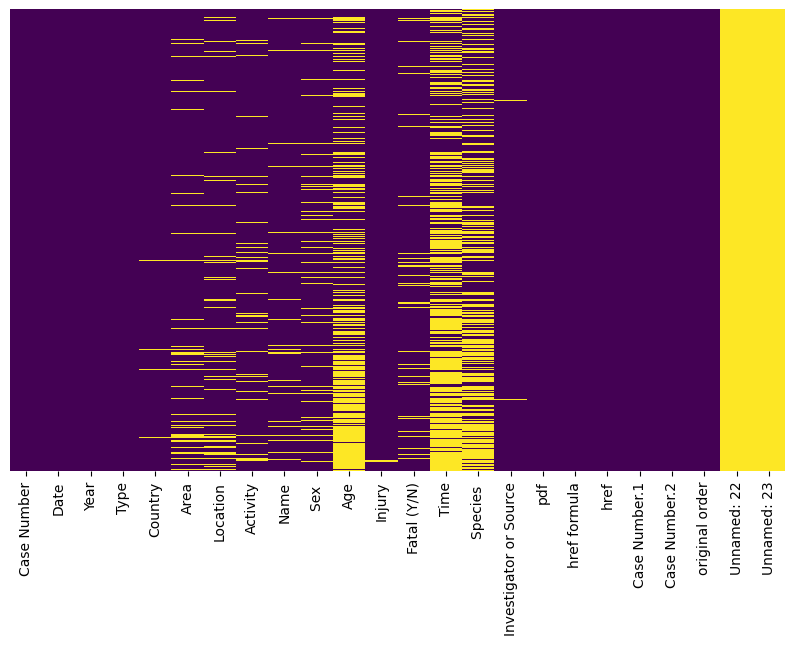

In [21]:
plt.figure(figsize=(10, 6))  # 100X60  pixeles


sns.heatmap(data.isna(),       # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',      # mapa de color
            cbar=False           # sin barra lateral
           )

plt.show();


In [22]:
data['Name'].fillna('unknown', inplace=True)

#No es realmente relevante para nosotros (según nuestro objetivo) el nombre de la persona,
#por lo que sustituimos los nulos por 'unknown'

In [23]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [24]:
casenumber_null = np.where(data['Case Number'].isna())
casenumber_null

#Podemos observar que hay un Nro de caso nulo que sustituiremos por '0' ya que no afectará
#nuestra data

(array([5488]),)

In [25]:
data.loc[5488, 'Case Number'] = 0

In [26]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [27]:
datos_desconocidos = ['Date', 'Year','Type','Country','Area', 'Location',
       'Activity','Sex ','Age','Injury','Fatal (Y/N)','Time','Species ','Investigator or Source','href formula','Unnamed: 22','Unnamed: 23']
data[datos_desconocidos] = data[datos_desconocidos].fillna('unknown')

In [28]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [29]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unknown,unknown
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unknown,unknown
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unknown,unknown


In [30]:
filas_con_unknown = data[data['Year'] == 'unknown']

In [31]:
filas_con_unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,unknown,Invalid,AUSTRALIA,Queensland,unknown,Spearfishing,Kerry Daniel,M,...,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,unknown,unknown
6079,1836.08.19.R,Reported 19-Aug-1836,unknown,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,unknown,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,unknown,unknown


In [32]:
data.loc[187, 'Year'] = 2017
data.loc[6079, 'Year'] = 1836

In [33]:
data['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown', 'Boat', 'Boatomg'], dtype=object)

## Observamos que en los tipos de ataque se repite boating pero hay 2 elementos mal escritos, por lo que hacemos una función para escribirlos bien y tener las categorías correctas

In [34]:
def limpiar_type(x):
    
    x = x.lower()
    
    if 'boat' in x:
        return 'boating'
    
    else:
        return x

In [35]:
data['Type'] = data['Type'].apply(limpiar_type)
data['Type'].unique()

array(['boating', 'unprovoked', 'invalid', 'provoked', 'questionable',
       'sea disaster', 'unknown'], dtype=object)

In [36]:
type_unknown = data[data['Type'] == 'unknown']
type_unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
85,2017.09.15.a,15-Sep-2017,2017.0,unknown,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,...,unknown,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,unknown,unknown
382,2015.07.27,27-Jul-2015,2015.0,unknown,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,unknown,unknown,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,unknown,unknown
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,unknown,VIETNAM,unknown,Saigon,Wreck of a sampam,8 crew,M,...,unknown,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,unknown,unknown
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,unknown,CEYLON,unknown,unknown,Diving,a pearl diver,M,...,unknown,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,unknown,unknown


## Teniendo la fila donde el valor del tipo de ataque es desconocido, al ser pocas filas revisamos los links donde describen el ataque y colocamos el tipo correspondiente

In [37]:
data.loc[85, 'Type'] = 'unprovoked'

In [38]:
data.loc[5705, 'Type'] = 'boating'

## Observando la columna Type, no me interesan los ataques 'invalid' ya que no fueron por tiburones

In [39]:
data = data[data['Type'] != 'invalid']
data.shape

(5755, 24)

## Revisamos la columna de 'Fatal (Y/N)'

In [40]:
unknown = data[data['Fatal (Y/N)'] == 'unknown']
unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
27,2018.04.15.c,15-Apr-2018,2018.0,unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,...,unknown,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0,unknown,unknown
269,2016.06.02.b,02-Jun-2016,2016.0,unprovoked,AUSTRALIA,New South Wales,Kingscliff,Spearfishing,Waade Madigan and Dr Seyong Kim,M,...,Bronze whaler sharks x 3,"Gold Coast Bulletin, 6/4/2016",2016.06.02.b-Matigan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.06.02.b,2016.06.02.b,6034.0,unknown,unknown
294,2016.03.28.b,28-Mar-2016,2016.0,unprovoked,USA,Florida,"Fort Myers Beach, Lee County",unknown,Nick Kawa,M,...,Shark involvement not confirmed,"Fox 35, 3/30/2015",2016.03.28.b-Kawa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.03.28.b,2016.03.28.b,6009.0,unknown,unknown
382,2015.07.27,27-Jul-2015,2015.0,unknown,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,unknown,unknown,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,unknown,unknown
1292,2008.01.30,2008.01.30,2008.0,provoked,JAPAN,Tokyo Bay,unknown,Diving,unknown,M,...,"Goblin shark, 4.2'",L Compagno,2008.01.30-GoblinShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.01.30,2008.01.30,5011.0,unknown,unknown
3452,1968.11.04,04-Nov-1968,1968.0,sea disaster,PAPUA NEW GUINEA,Madang Province,unknown,Wreck of the Storm King,male,unknown,...,Shark involvement prior to death was not confi...,"The Sydney Morning Herald, 11/9/1968",1968.11.04-StormKing.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1968.11.04,1968.11.04,2851.0,unknown,unknown
3506,1967.09.13,13-Sep-1967,1967.0,provoked,ITALY,Brindisi Province,Brindisi,Scuba diving,Romeo Guarini,M,...,2 m shark,C. Moore. GSAF,1967.09.13-Guarini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.09.13,1967.09.13,2797.0,unknown,unknown
4127,1958.12.28,28-Dec-1958,1958.0,boating,TURKEY,Ahirkapi coast,Constantinople,Fishing,Fishing boat. Occupants: Yunus Potur & Ali Durmaz,unknown,...,White shark,"C. Moore, GSAF",1958.12.28-Constantinople.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.12.28,1958.12.28,2176.0,unknown,unknown
4333,1954.07.27,27-Jul-1954,1954.0,boating,ITALY,Venice Province,Off Chioggia,Fishing trawler Flavio Gioia,10 crew,M,...,5m shark,"C. Moore, GSAF",1954.07.27-Trawler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1954.07.27,1954.07.27,1970.0,unknown,unknown
5630,1895.09.18,18-Sep-1895,1895.0,sea disaster,CUBA,Havana Province,Havana Harbor,Shipwreck,male,M,...,Questionable,"NY Times, 9/21/1895",1895.09.18-HavanaShipwreck.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.09.18,1895.09.18,673.0,unknown,unknown


## Viendo los valores desconocidos en la columna Fatal (Y/N), podemos encontrar que según la descripción de la columna Injury, tenemos datos para saber si la persona murió o no

In [41]:
data.loc[27, 'Fatal (Y/N)'] = 'N'
data.loc[269, 'Fatal (Y/N)'] = 'N'
data.loc[294, 'Fatal (Y/N)'] = 'N'
data.loc[382, 'Fatal (Y/N)'] = 'N'
data.loc[1292, 'Fatal (Y/N)'] = 'N'
data.loc[3452, 'Fatal (Y/N)'] = 'Y'
data.loc[3506, 'Fatal (Y/N)'] = 'N'
data.loc[4127, 'Fatal (Y/N)'] = 'N'
data.loc[4333, 'Fatal (Y/N)'] = 'N'
data.loc[5630, 'Fatal (Y/N)'] = 'Y'
data.loc[5945, 'Fatal (Y/N)'] = 'N'
data.loc[6104, 'Fatal (Y/N)'] = 'Y'
data.loc[6122, 'Fatal (Y/N)'] = 'Y'
data.loc[6125, 'Fatal (Y/N)'] = 'Y'
data.loc[6158, 'Fatal (Y/N)'] = 'N'

In [42]:
data['Fatal (Y/N)'].unique()

array(['N', 'Y', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'], dtype=object)

In [43]:
def limpiar_fatal(x):
    
    x = x.lower()
    
    if 'n' in x:
        return 'N'
    elif 'y' in x:
        return 'Y'
    else:
        return x

In [44]:
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].apply(limpiar_fatal)
data['Fatal (Y/N)'].unique()

array(['N', 'Y', 'm', '2017'], dtype=object)

In [45]:
filas_con_unknown = data[data['Fatal (Y/N)'] == 'm']
filas_con_unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
285,2016.04.18.b,18-Apr-2016,2016.0,provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,...,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0,unknown,unknown


## Tenemos un valor 'm' en la columna Fatal (Y/N) y revisando la columna de injury, podemos ver que no murió por lo que asignamos una 'N'

In [46]:
data.loc[285, 'Fatal (Y/N)'] = 'N'

In [47]:
#data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [48]:
filas_con_unknown = data[data['Fatal (Y/N)'] == '2017']
filas_con_unknown

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
786,2012.06.10,10-Jun-2012,2012.0,provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,...,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,unknown,unknown


In [49]:
data.loc[786, 'Fatal (Y/N)'] = 'N'

## Chequeamos de nuevo los valores únicos de la columna Fatal (Y/N)

In [50]:
data['Fatal (Y/N)'].unique()

array(['N', 'Y'], dtype=object)

## Cambiamos el tipo de dato de la columna Year (que era float) a entero

In [51]:
data['Year'] = data['Year'].astype(int)

## Revisamos la columna de género para ordenar los valores y filtrar

In [52]:
data['Sex '].unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [53]:
data = data[data['Sex '] != '.']

In [54]:
data = data[data['Sex '] != 'lli']

In [55]:
def limpiar_fecha(x):
    
    x = x.lower()
    
    if 'm' in x:
        return 'M'
    elif 'f' in x:
        return 'F'
    if 'n' in x:
        return 'N'
    elif 'f' in x:
        return 'F'
    else:
        return x

In [56]:
data['Sex '] = data['Sex '].apply(limpiar_fecha)
data['Sex '].unique()

array(['F', 'M', 'N'], dtype=object)

## ## Revisamos la columna de Fecha para ordenar los valores y filtrar

In [57]:
data['Date'].unique()

array(['25-Jun-2018', '18-Jun-2018', '08-Jun-2018', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

In [58]:
data['Date'] = data['Date'].str.replace('Reported', '').str.strip()

In [59]:
data = data[data['Date'] != 'may 2018']

data['Date'].unique()

array(['25-Jun-2018', '18-Jun-2018', '08-Jun-2018', ..., '1900-1905',
       '1883-1889', '1845-1853'], dtype=object)

In [60]:
def try_parsing_date(text):
    for fmt in ('%d-%b-%Y', '%b %Y'):
        try:
            return pd.to_datetime(parse(text).strftime('%d-%b-%Y'), format='%d-%b-%Y')
        except ValueError:
            pass
    return pd.NaT  

data['Date'] = data['Date'].apply(try_parsing_date)

In [61]:
data.rename(columns={'Unnamed: 22': 'Day'}, inplace=True)
data.rename(columns={'Unnamed: 23': 'Month'}, inplace=True)

In [62]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.strftime('%b')

In [63]:
data['Date'] = data['Date'].dt.date

In [64]:
columnas = data.columns

nuevo_orden = ['Case Number', 'Date', 'Day','Month','Year'] + [col for col in columnas if col not in ['Case Number', 'Date', 'Day','Month','Year']]
data = data[nuevo_orden]
data.head()

,Case Number,Date,Day,Month,Year,Type,Country,Area,Location,Activity,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,2018-06-25,25.0,Jun,2018,boating,USA,California,"Oceanside, San Diego County",Paddling,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,2018-06-18,18.0,Jun,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,...,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
3,2018.06.08,2018-06-08,8.0,Jun,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,...,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,2018-06-04,4.0,Jun,2018,provoked,MEXICO,Colima,La Ticla,Free diving,...,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
5,2018.06.03.b,2018-06-03,3.0,Jun,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,...,N,unknown,unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0


In [65]:
#Eliminamos las filas no tienen una fecha determinada del ataque, que bajo nuestro criterio
#no nos interesan, ya que queremos conocer la temporada de mas ataques y para ello necesitamos este dato
data = data.dropna(subset=['Date'])

In [66]:
data.shape

(5469, 24)

## Vamos a revisar la columna de países para ver si hay valores repetidos

In [67]:
data['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'SOUTH AFRICA', 'THAILAND',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'ECUADOR',
       'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'ITALY', 'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'AZORES',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SO

In [68]:
def limpiar_country(x):
    x = x.lower()
    
    if 'andaman' in x:
        return 'ANDAMAN'
    elif 'aus' in x:
        return 'AUSTRALIA'
    elif 'aruba' in x:
        return 'ARUBA'
    elif 'ceylon' in x:
        return 'CEYLON'
    elif 'egypt' in x:
        return 'EGYPT'
    elif 'fiji' in x:
        return 'FIJI'
    elif 'maldive' in x:
        return 'MALDIVE ISLANDS'   
    elif 'mexico' in x:
        return 'MEXICO'
    elif 'guinea' in x:
        return 'GUINEA'
    elif 'philippines' in x:
        return 'PHILIPPINES'
    elif 'nicaragua' in x:
        return 'NICARAGUA'
    elif 'red sea' in x:
        return 'RED SEA'
    elif 'sierra leon' in x:
        return 'SIERRA LEONE'
    elif 'st. ma' in x:
        return 'ST. MAARTIN'
    elif 'tonga' in x:
        return 'TONGA'  
    elif 'england' in x:
        return 'UNITED KINGDOM' 
    elif 'yemen' in x:
        return 'YEMEN'
    elif 'indian ocean' in x:
        return 'INDIAN OCEAN'
    elif 'south sea' in x:
        return 'SOUTH SEA'
    elif 'atlantic ocean' in x:
        return 'ATLANTIC OCEAN'    
    elif 'pacific ocean' in x:
        return 'PACIFIC OCEAN'    
    else:
        return x.upper()

In [69]:
data['Country'] = data['Country'].apply(limpiar_country)
data['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'SOUTH AFRICA', 'THAILAND',
       'COSTA RICA', 'MALDIVE ISLANDS', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'FIJI',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MAARTIN', 'FRANCE', 'GUINEA',
       'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL', 'DIEGO GARCIA',
       'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM', 'SEYCHELLES',
       'BELIZE', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND', 'ITALY',
       'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'AZORES',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SOMALIA', 'C

## Haremos una función que nos permita saber, según la fecha y el país, en cuál estación del año sucedió el ataque

In [70]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [71]:
hemisferio_norte = ['USA','INDONESIA','BRAZIL','DR CONGO','ECUADOR','REPUBLIC OF THE CONGO','GABON',
    'KIRIBATI','KENYA','COLOMBIA','UGANDA','SOMALIA','GUINEA',
    'MALDIVES','SAO TOME AND PRINCIPE','INDIA','CHINA','PAKISTAN','NIGERIA','BANGLADESH','RUSSIA',
    'MEXICO','ETHIOPIA','JAPAN','PHILIPPINES','EGYPT','VIETNAM','IRAN','TURKEY','GERMANY','THAILAND',
    'UNITED KINGDOM','FRANCE','ITALY','MYANMAR','SOUTH KOREA','SUDAN','SPAIN','ALGERIA','IRAQ',
    'AFGHANISTAN','POLAND','CANADA','MOROCCO','SAUDI ARABIA','UKRAINE','UZBEKISTAN','YEMEN','MALAYSIA',
    'GHANA','NEPAL','IVORY COAST','VENEZUELA','CAMEROON','NIGER','NORTH KOREA','TAIWAN','MALI',
    'BURKINA FASO','SRI LANKA','ROMANIA','KAZAKHSTAN','CHAD','GUATEMALA','SENEGAL','NETHERLANDS',
    'CAMBODIA','BENIN','TUNISIA','HAITI','BELGIUM','JORDAN','DOMINICAN REPUBLIC','SOUTH SUDAN','SWEDEN','HONDURAS','CZECH REPUBLIC','AZERBAIJAN',
    'GREECE','PORTUGAL','HUNGARY','TAJIKISTAN','UNITED ARAB EMIRATES','BELARUS','ISRAEL','TOGO','AUSTRIA','SWITZERLAND',
    'SIERRA LEONE','LAOS','HONG KONG','SERBIA','NICARAGUA','LIBYA','KYRGYZSTAN','BULGARIA','TURKMENISTAN',
    'EL SALVADOR','SINGAPORE','DENMARK','SLOVAKIA','CENTRAL AFRICAN REPUBLIC','FINLAND','NORWAY','LIBERIA',
    'PALESTINE','LEBANON','COSTA RICA','IRELAND','MAURITANIA','OMAN','PANAMA','KUWAIT','CROATIA',
    'ERITREA','GEORGIA','MONGOLIA','MOLDOVA','PUERTO RICO','BOSNIA AND HERZEGOVINA','ALBANIA','JAMAICA',
    'ARMENIA','GAMBIA','LITHUANIA','QATAR','GUINEA BISSAU','SLOVENIA','NORTH MACEDONIA','LATVIA','TRINIDAD AND TOBAGO',
    'BAHRAIN','ESTONIA','CYPRUS','DJIBOUTI','GUYANA','BHUTAN','MACAU','LUXEMBOURG','MONTENEGRO','SURINAME','CAPE VERDE',
    'WESTERN SAHARA','MALTA','BRUNEI','BAHAMAS','BELIZE','ICELAND','MARTINIQUE','FRENCH GUIANA','BARBADOS',
    'CURACAO','SAINT LUCIA','GUAM','GRENADA','JERSEY','ARUBA','SAINT VINCENT AND THE GRENADINES',
    'UNITED STATES VIRGIN ISLANDS','ANTIGUA AND BARBUDA','ISLE OF MAN','ANDORRA','DOMINICA','BERMUDA','GUERNSEY','GREENLAND','FAROE ISLANDS','NORTHERN MARIANA ISLANDS',
    'SAINT KITTS AND NEVIS','TURKS AND CAICOS ISLANDS','SINT MAARTEN','LIECHTENSTEIN','MONACO','SAN MARINO',
    'GIBRALTAR','SAINT MARTIN','BRITISH VIRGIN ISLANDS','PALAU','ANGUILLA','SAINT BARTHELEMY','SAINT PIERRE AND MIQUELON',
    'MONTSERRAT','VATICAN CITY'
]



def determinar_estacion(fecha, pais):

    if pais in hemisferio_norte:
        primavera_inicio = datetime(fecha.year, 3, 20)
        verano_inicio = datetime(fecha.year, 6, 21)
        otoño_inicio = datetime(fecha.year, 9, 23)
        invierno_inicio = datetime(fecha.year, 12, 21)  
        
        if (fecha >= primavera_inicio and fecha < verano_inicio) or (fecha >= invierno_inicio):
            return 'SPRING'
        elif fecha >= verano_inicio and fecha < otoño_inicio:
            return 'SUMMER'
        elif fecha >= otoño_inicio and fecha < invierno_inicio:
            return 'AUTUMN'
        else:
            return 'WINTER'
    
    elif pais not in hemisferio_norte:
        # Criterios para asignar estaciones en Australia
        otoño_inicio = datetime(fecha.year, 3, 20)
        invierno_inicio = datetime(fecha.year, 6, 21)
        primavera_inicio = datetime(fecha.year, 9, 23)
        verano_inicio = datetime(fecha.year, 12, 21)

        if (fecha >= primavera_inicio and fecha < verano_inicio) or (fecha >= invierno_inicio):
            return 'SPRING'
        elif fecha >= verano_inicio and fecha < otoño_inicio:
            return 'WINTER'
        elif fecha >= otoño_inicio and fecha < invierno_inicio:
            return 'AUTUMN'
        else:
            return 'SUMMER'

data['Season'] = data.apply(lambda row: determinar_estacion(row['Date'], row['Country']), axis=1)

In [72]:
data.head(10)

,Case Number,Date,Day,Month,Year,Type,Country,Area,Location,Activity,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Season
0,2018.06.25,2018-06-25,25.0,Jun,2018,boating,USA,California,"Oceanside, San Diego County",Paddling,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,SUMMER
1,2018.06.18,2018-06-18,18.0,Jun,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,...,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,SPRING
3,2018.06.08,2018-06-08,8.0,Jun,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,...,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,AUTUMN
4,2018.06.04,2018-06-04,4.0,Jun,2018,provoked,MEXICO,Colima,La Ticla,Free diving,...,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,SPRING
5,2018.06.03.b,2018-06-03,3.0,Jun,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,...,unknown,unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,AUTUMN
6,2018.06.03.a,2018-06-03,3.0,Jun,2018,unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,...,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,SPRING
7,2018.05.27,2018-05-27,27.0,May,2018,unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,...,unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,SPRING
8,2018.05.26.b,2018-05-26,26.0,May,2018,unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,...,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,SPRING
9,2018.05.26.a,2018-05-26,26.0,May,2018,unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,...,14h00,unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,SPRING
10,2018.05.24,2018-05-24,24.0,May,2018,provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,...,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,AUTUMN


In [73]:
nuevo_orden = ['Case Number', 'Date', 'Season','Country','Species ','Sex ','Age','Fatal (Y/N)']+ [col for col in columnas if col not in ['Case Number', 'Date', 'Season','Country','Species ','Sex ','Age','Fatal (Y/N)']]
data = data[nuevo_orden]

In [74]:
data.head()

,Case Number,Date,Season,Country,Species,Sex,Age,Fatal (Y/N),Year,Type,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Day,Month
0,2018.06.25,2018-06-25,SUMMER,USA,White shark,F,57,N,2018,boating,...,18h00,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,25.0,Jun
1,2018.06.18,2018-06-18,SPRING,USA,unknown,F,11,N,2018,unprovoked,...,14h00 -15h00,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,18.0,Jun
3,2018.06.08,2018-06-08,AUTUMN,AUSTRALIA,2 m shark,M,unknown,N,2018,unprovoked,...,unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,8.0,Jun
4,2018.06.04,2018-06-04,SPRING,MEXICO,"Tiger shark, 3m",M,unknown,N,2018,provoked,...,unknown,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,4.0,Jun
5,2018.06.03.b,2018-06-03,AUTUMN,AUSTRALIA,unknown,M,unknown,N,2018,unprovoked,...,unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,3.0,Jun


## Columna 'Age', limpieza y filtrado para un rango entre 15 y 60 años

In [76]:
data['Age'] = data['Age'].str.replace(r'\D', '', regex=True)
data['Age'].unique()

array(['57', '11', '', '18', '52', '15', '12', '32', '10', '34', '30',
       '60', '33', '29', '54', '41', '37', '19', '25', '69', '38', '55',
       '35', '45', '40', '28', '20', '24', '26', '49', '14', '22', '7',
       '31', '17', '13', '42', '3', '50', '46', '16', '82', '48', '21',
       '51', '39', '58', '47', '61', '65', '73', '36', '66', '43', '9',
       '72', '59', '6', '64', '23', '71', '44', '27', '62', '68', '63',
       '70', '53', '8', '77', '74', '56', '2826', '5', '86', '1820',
       '1213', '4634', '282330', '3626', '84', '3036', '3337', '731',
       '3230', '87', '75', '2126', '1822', '912', '2326', '1', '2528',
       '3032', '5030', '1735', '1318', '3326', '81', '78', '1716', '810',
       '910', '3623', '1012', '3133', '2'], dtype=object)

In [115]:
data = data[data['Age'].str.count(r'\d') <= 2] 
data['Age'].value_counts()

AttributeError: Can only use .str accessor with string values!

In [ ]:
data.shape

In [116]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Vamos a basarnos en los ataques en personas entre 15 y 60 años

filtered_df = data[(data['Age'] >= 15) & (data['Age'] < 60)]
filtered_df

data = data[(data['Age'] >= 15) & (data['Age'] < 60)]

data.shape

(2601, 25)

In [117]:
data['Age'].mean()

#El promedio de edad de las personas que han sufrido de ataques es de 28 años

28.487504805843905

In [118]:
data.head(10)

,Case Number,Date,Season,Country,Species,Sex,Age,Fatal (Y/N),Year,Type,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Day,Month
0,2018.06.25,2018-06-25,SUMMER,USA,WHITE SHARK,F,57.0,N,2018,boating,...,18h00,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,25.0,Jun
6,2018.06.03.a,2018-06-03,SPRING,BRAZIL,TIGER SHARK,M,18.0,Y,2018,unprovoked,...,Late afternoon,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,3.0,Jun
7,2018.05.27,2018-05-27,SPRING,USA,LEMON SHARK,M,52.0,N,2018,unprovoked,...,unknown,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,27.0,May
8,2018.05.26.b,2018-05-26,SPRING,USA,BULL SHARK,M,15.0,N,2018,unprovoked,...,17h00,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,26.0,May
10,2018.05.24,2018-05-24,AUTUMN,AUSTRALIA,REEF SHARK,M,32.0,N,2018,provoked,...,Morning,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,24.0,May
14,2018.05.00,2018-05-23,AUTUMN,AUSTRALIA,NURSE SHARK,F,34.0,N,2018,provoked,...,unknown,"Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,23.0,May
18,2018.04.28.b,2018-04-28,SPRING,COSTA RICA,TIGER SHARK,M,30.0,N,2018,unprovoked,...,10h40,Costa Rica Star. 4/28/2018,2018.04.28.b-CostaRica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.b,2018.04.28.b,6285.0,28.0,Apr
23,2018.04.23,2018-04-23,AUTUMN,MALDIVE ISLANDS,TIGER SHARK,M,32.0,N,2018,unprovoked,...,21h50,"K. McMurray, TrackingSharks.com",2018.04.23-Maldives.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.23,2018.04.23,6280.0,23.0,Apr
24,2018.04.22,2018-04-22,AUTUMN,SOUTH AFRICA,WHITE SHARK,M,33.0,N,2018,unprovoked,...,09h40,"Africa News Agency, 4/22/2018",2018.04.22-PlettenbergBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.22,2018.04.22,6279.0,22.0,Apr
25,2018.04.19,2018-04-19,SPRING,USA,6' SHARK,M,29.0,N,2018,unprovoked,...,unknown,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278.0,19.0,Apr


In [119]:
pais_freq = data['Country'].value_counts()
pais_freq

Country
USA                1073
AUSTRALIA           555
SOUTH AFRICA        303
BAHAMAS              57
BRAZIL               50
                   ... 
SOMALIA               1
SOUTH CHINA SEA       1
WESTERN SAMOA         1
BRITISH ISLES         1
SRI LANKA             1
Name: count, Length: 112, dtype: int64

In [120]:
estacion_freq = data['Season'].value_counts()
estacion_freq

Season
SUMMER    983
SPRING    946
AUTUMN    550
WINTER    122
Name: count, dtype: int64

## Un total de 489 muertes entre 15 y 60 años

In [125]:
fatal_freq = data['Fatal (Y/N)'].value_counts()
fatal_freq

Fatal (Y/N)
N    2112
Y     489
Name: count, dtype: int64

## Para conocer el número de muertes a causa de los ataques de tiburones, por país

In [113]:
result_age = (data['Country'] == 'USA') & (data['Fatal (Y/N)'] == 'Y')
result_age.value_counts()

False    2540
True       61
Name: count, dtype: int64

In [87]:
result_aus = (data['Country'] == 'AUSTRALIA') & (data['Fatal (Y/N)'] == 'Y')
result_aus.value_counts()

False    2454
True      147
Name: count, dtype: int64

## ## Número de muertes a causa de los ataques de tiburones, por país y género

In [89]:
result_usa_hombres = (data['Country'] == 'USA') & (data['Sex '] == 'M') & (data['Fatal (Y/N)'] == 'Y')
result_usa_hombres.value_counts()

False    2547
True       54
Name: count, dtype: int64

In [90]:
result_usa_mujeres = (data['Country'] == 'USA') & (data['Sex '] == 'F') & (data['Fatal (Y/N)'] == 'Y')
result_usa_mujeres.value_counts()

False    2594
True        7
Name: count, dtype: int64

In [91]:
result_aus_hombres = (data['Country'] == 'AUSTRALIA') & (data['Sex '] == 'M') & (data['Fatal (Y/N)'] == 'Y')
result_aus_hombres.value_counts()

False    2464
True      137
Name: count, dtype: int64

In [92]:
result_aus_mujeres = (data['Country'] == 'AUSTRALIA') & (data['Sex '] == 'F') & (data['Fatal (Y/N)'] == 'Y')
result_aus_mujeres.value_counts()

False    2591
True       10
Name: count, dtype: int64

In [93]:
result_season = (data['Country'] == 'AUSTRALIA') & (data['Fatal (Y/N)'] == 'Y') & ((data['Season'] == 'SUMMER'))
result_season.value_counts()

False    2555
True       46
Name: count, dtype: int64

In [94]:
data.head(20)

,Case Number,Date,Season,Country,Species,Sex,Age,Fatal (Y/N),Year,Type,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Day,Month
0,2018.06.25,2018-06-25,SUMMER,USA,White shark,F,57.0,N,2018,boating,...,18h00,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,25.0,Jun
6,2018.06.03.a,2018-06-03,SPRING,BRAZIL,Tiger shark,M,18.0,Y,2018,unprovoked,...,Late afternoon,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,3.0,Jun
7,2018.05.27,2018-05-27,SPRING,USA,"Lemon shark, 3'",M,52.0,N,2018,unprovoked,...,unknown,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,27.0,May
8,2018.05.26.b,2018-05-26,SPRING,USA,"Bull shark, 6'",M,15.0,N,2018,unprovoked,...,17h00,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,26.0,May
10,2018.05.24,2018-05-24,AUTUMN,AUSTRALIA,Grey reef shark,M,32.0,N,2018,provoked,...,Morning,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,24.0,May
14,2018.05.00,2018-05-23,AUTUMN,AUSTRALIA,"Tawny nurse shark, 2m",F,34.0,N,2018,provoked,...,unknown,"Perth Now, 6/30/2018",2018.05.00-Brunning.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.00,2018.05.00,6289.0,23.0,May
18,2018.04.28.b,2018-04-28,SPRING,COSTA RICA,Tiger shark,M,30.0,N,2018,unprovoked,...,10h40,Costa Rica Star. 4/28/2018,2018.04.28.b-CostaRica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.28.b,2018.04.28.b,6285.0,28.0,Apr
23,2018.04.23,2018-04-23,AUTUMN,MALDIVE ISLANDS,Tiger shark,M,32.0,N,2018,unprovoked,...,21h50,"K. McMurray, TrackingSharks.com",2018.04.23-Maldives.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.23,2018.04.23,6280.0,23.0,Apr
24,2018.04.22,2018-04-22,AUTUMN,SOUTH AFRICA,"White shark, 2.5 m",M,33.0,N,2018,unprovoked,...,09h40,"Africa News Agency, 4/22/2018",2018.04.22-PlettenbergBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.22,2018.04.22,6279.0,22.0,Apr
25,2018.04.19,2018-04-19,SPRING,USA,6' shark,M,29.0,N,2018,unprovoked,...,unknown,"The Garden Island, 4/19/2018",2018.04.19-McWilliams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.19,2018.04.19,6278.0,19.0,Apr


## Especies

In [104]:
def limpiar_especies(x):
    x = x.lower()
    
    if 'white' in x:
        return 'WHITE SHARK'
    elif 'tiger' in x:
        return 'TIGER SHARK'
    elif 'lemon' in x:
        return 'LEMON SHARK'
    elif 'bull' in x:
        return 'BULL SHARK'
    elif 'nurse' in x:
        return 'NURSE SHARK'
    elif 'mako' in x:
        return 'MAKO SHARK'
    elif 'reef' in x:
        return 'REEF SHARK'        
    else:
        return x.upper()

In [105]:
data['Species '] = data['Species '].apply(limpiar_especies)
data['Species '].unique()

array(['WHITE SHARK', 'TIGER SHARK', 'LEMON SHARK', 'BULL SHARK',
       'REEF SHARK', 'NURSE SHARK', "6' SHARK", 'UNKNOWN', '1.8 M SHARK',
       'BLACKTIP SHARK', 'GALAPAGOS SHARK?', 'SMALL SHARK', '2 M SHARK',
       'WOBBEGONG SHARK, 1 M', "8' SHARK", "5' TO 6' SHARK", "4' SHARK",
       '"A SMALL SHARK"', '3M SHARK, PROBABLY A SMOOTH HOUND', "3' SHARK",
       "9' SHARK", "10' SHARK", 'WOBBEGONG SHARK, 2M', " 6' TO 8' SHARK",
       'BLUE SHARK', 'DOGFISH SHARK', "3' TO 4' SHARK", "3' TO 5' SHARK",
       "5' SHARK", 'MAKO SHARK', "BLACKTIP SHARK, 4'", '3 M SHARK',
       "SILKY SHARK, 6.5'", "BRONZE WHALER SHARK, 6'", 'GALAPAGOS SHARK',
       "SPINNER SHARK, 7'", "SPINNER SHARK, 5'",
       "BLACKTIP SHARK, 5' TO 6'", 'HAMMERHEAD SHARK.',
       "HAMMERHEAD SHARK. 6' TO 7'", "BLACKTIP OR SPINNER SHARK, 4'",
       'BRONZE WHALER SHARK, 1.5M', 'WOBBEGONG SHARK',
       '1M TO 1.2 M SHARK', 'BLUE SHARK, 8 TO 9 FEET', '3.5 TO 4 M SHARK',
       '2 M TO  3 M SHARK', '1.5 M SHARK', '

In [106]:
data['Species '].value_counts()

Species 
UNKNOWN                                         968
WHITE SHARK                                     409
TIGER SHARK                                     171
BULL SHARK                                      103
NURSE SHARK                                      57
                                               ... 
SPINNER SHARK OR BLACKTIP SHARK                   1
A 2' SHARK WAS SEEN IN THE AREA BY WITNESSES      1
1.8 METRE SHARK                                   1
60 CM TO 90 CM [2' TO 3'] SHARK                   1
16' SHARK                                         1
Name: count, Length: 433, dtype: int64

In [111]:
data.head()

,Case Number,Date,Season,Country,Species,Sex,Age,Fatal (Y/N),Year,Type,...,Time,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Day,Month
0,2018.06.25,2018-06-25,SUMMER,USA,WHITE SHARK,F,57.0,N,2018,boating,...,18h00,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,25.0,Jun
6,2018.06.03.a,2018-06-03,SPRING,BRAZIL,TIGER SHARK,M,18.0,Y,2018,unprovoked,...,Late afternoon,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,3.0,Jun
7,2018.05.27,2018-05-27,SPRING,USA,LEMON SHARK,M,52.0,N,2018,unprovoked,...,unknown,"K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,27.0,May
8,2018.05.26.b,2018-05-26,SPRING,USA,BULL SHARK,M,15.0,N,2018,unprovoked,...,17h00,"K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,26.0,May
10,2018.05.24,2018-05-24,AUTUMN,AUSTRALIA,REEF SHARK,M,32.0,N,2018,provoked,...,Morning,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,24.0,May


## Columna 'Activity'

In [99]:
def limpiar_activity(x):
    x = x.lower()
    
    if 'surf' in x:
        return 'SURFING'
    elif 'scuba' in x:
        return 'SCUBA'
    elif 'fishing' in x:
        return 'FISHING'
    else:
        return x.upper()

In [100]:
data['Activity'] = data['Activity'].apply(limpiar_activity)

## Para conocer la actividad mas frecuente donde se generaban ataques

In [101]:
activity_freq = data['Activity'].value_counts()
activity_freq

Activity
SURFING                                                         854
FISHING                                                         403
SWIMMING                                                        361
UNKNOWN                                                          76
SCUBA                                                            73
                                                               ... 
SWIMMING BEHIND SAILBOAT                                          1
FINNING THE SHARK THAT BIT HIM                                    1
HOOKAH DIVING FOR PEN SHELLS                                      1
SNORKELING, CARRYING A SPEARED FISH IN HER HAND                   1
BRITISH SHIP, BRITANNIA,  WAS LOADING LUMBER. HE WAS BATHING      1
Name: count, Length: 368, dtype: int64

In [112]:
result_activity = (data['Country'] == 'USA') & (data['Fatal (Y/N)'] == 'N') & (data['Activity'] == 'SURFING')
result_activity.value_counts()

False    2594
True        7
Name: count, dtype: int64